# Matplotlib & Seaborn

## Overview

- matplotlib is a python 2D plotting library built on the top of the basic Python language and Numpy.
- More about matplotlib can be found in its [documentation](http://matplotlib.org/contents.html).
- Seaborn is a Python visualization library based on matplotlib. 
- It provides a high-level interface for drawing - attractive statistical graphics. Here is the [documentation](http://seaborn.pydata.org/index.html).
- If you want a live demo of your jupyter notebook, try this [nbviewer](http://nbviewer.jupyter.org/) website.
- Plotly is an interactive, browser-based graphing library. Any chart that you could make in matplotlib, you can make interactive with Plotly. 
- To install the packages, cd to the lecture code directory and run the following command `pip install plotly==2.2.3`
- You need to restart the kernel in order to make it work.

- To display the graph inside IPython notebook, we need to run the following line of code.

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

- For today's lecture, we will use the IMDB dataset scraped by Sun Chuan, who is one of our graduates from Bootcamp 6.

- He also uploaded the dataset to Kaggle so you can check it out [here](https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset). Let's load the data first.

In [3]:
df = pd.read_csv('https://s3.amazonaws.com/nycdsabt01/movie_metadata.csv')

Let's brush up our pandas knowledge first.
- The `head()` method will return the first 5 rows in your dataframe.
- You can specify the number of rows you want to return as the input argument.

In [4]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


- You might see those `...` since there are too many columns there. We want to get the whole idea how does the dataset look like. 
- You can save all the columns to a Python list. It is a little bit better.

In [5]:
df.columns.tolist()

['color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

- We can also tell pandas to display a larger number of columns without truncating them.

In [6]:
pd.set_option('display.max_columns', 50)

In [7]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


- The `shape` attribute will return the dimensions of your dataframe.

In [8]:
df.shape

(5043, 28)

- The `describe()` method will return the statistics of numeric columns (exclude missing value).

In [9]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


- To get the statistics of a category column, we might call the `value_counts()` method.

In [10]:
df['language'].value_counts()

English       4704
French          73
Spanish         40
Hindi           28
Mandarin        26
German          19
Japanese        18
Russian         11
Italian         11
Cantonese       11
Korean           8
Portuguese       8
Arabic           5
Swedish          5
Danish           5
Hebrew           5
Norwegian        4
Dutch            4
Persian          4
Polish           4
Chinese          3
Thai             3
None             2
Icelandic        2
Indonesian       2
Dari             2
Romanian         2
Zulu             2
Aboriginal       2
Tamil            1
Panjabi          1
Greek            1
Slovenian        1
Filipino         1
Aramaic          1
Telugu           1
Vietnamese       1
Mongolian        1
Kazakh           1
Bosnian          1
Kannada          1
Urdu             1
Hungarian        1
Maya             1
Swahili          1
Czech            1
Dzongkha         1
Name: language, dtype: int64

### Exercise 1

- Create a subset of our original dataframe that only contains films whose language is either English, French or Mandarin.
- At the same time, only return the films that have `imdb_score > 7`
- A pandas series object has a method called `isin` that might come in handy.

In [28]:
# Your code here.
langs = ["English" ,"French", "Mandarin"]
#df.loc[(df["language"].isin(langs)) & (df["imdb_score"]>7)]
df.loc[(df['language'].isin(langs)) & (df["imdb_score"]>7)]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,artificial intelligence|based on comic book|ca...,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,58753,Rupert Grint,3.0,blood|book|love|potion|professor,http://www.imdb.com/title/tt0417741/?ref_=fn_t...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000
13,Color,Gore Verbinski,313.0,151.0,563.0,1000.0,Orlando Bloom,40000.0,423032628.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: Dead Man's Chest,522040,48486,Jack Davenport,2.0,box office hit|giant squid|heart|liar's dice|m...,http://www.imdb.com/title/tt0383574/?ref_=fn_t...,1832.0,English,USA,PG-13,225000000.0,2006.0,5000.0,7.3,2.35,5000
15,Color,Zack Snyder,733.0,143.0,0.0,748.0,Christopher Meloni,15000.0,291021565.0,Action|Adventure|Fantasy|Sci-Fi,Henry Cavill,Man of Steel,548573,20495,Harry Lennix,0.0,based on comic book|british actor playing amer...,http://www.imdb.com/title/tt0770828/?ref_=fn_t...,2536.0,English,USA,PG-13,225000000.0,2013.0,3000.0,7.2,2.35,118000
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
20,Color,Peter Jackson,422.0,164.0,0.0,773.0,Adam Brown,5000.0,255108370.0,Adventure|Fantasy,Aidan Turner,The Hobbit: The Battle of the Five Armies,354228,9152,James Nesbitt,0.0,army|elf|hobbit|middle earth|orc,http://www.imdb.com/title/tt2310332/?ref_=fn_t...,802.0,English,New Zealand,PG-13,250000000.0,2014.0,972.0,7.5,2.35,65000


# Histogram

- To plot a histogram, we need to call the `hist()` function in matplotlib.
- The input should be a **numeric** column of the dataframe.

(array([  16.,   38.,  102.,  222.,  579., 1158., 1515., 1085.,  307.,
          21.]),
 array([1.6 , 2.39, 3.18, 3.97, 4.76, 5.55, 6.34, 7.13, 7.92, 8.71, 9.5 ]),
 <a list of 10 Patch objects>)

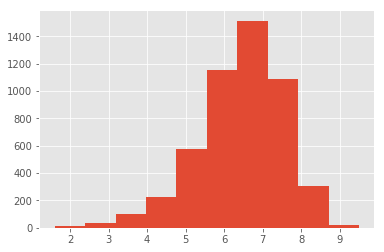

In [29]:
plt.hist(df['imdb_score'])

- Explore some of the available parameters when you move your cursor inside the function parentheses and press **shift+tab**
- For example, we can change the color and the number of bins. For color, you can simply type `"blue"` or `"b"` for short. At the same time, it accepts hex color code, which you can pick a color from this [website](http://www.color-hex.com/) and paste the hexadecimal code.

(array([  2.,   3.,   2.,   6.,   3.,   4.,   8.,   9.,   9.,   8.,  24.,
         12.,  29.,  23.,  14.,  44.,  20.,  56.,  71.,  31., 104.,  42.,
        139.,  92., 202., 229., 124., 275., 179., 351., 185., 387., 404.,
        174., 365., 195., 331., 264., 114., 181.,  75., 111.,  40.,  53.,
         28.,   7.,   8.,   3.,   2.,   1.]),
 array([1.6  , 1.758, 1.916, 2.074, 2.232, 2.39 , 2.548, 2.706, 2.864,
        3.022, 3.18 , 3.338, 3.496, 3.654, 3.812, 3.97 , 4.128, 4.286,
        4.444, 4.602, 4.76 , 4.918, 5.076, 5.234, 5.392, 5.55 , 5.708,
        5.866, 6.024, 6.182, 6.34 , 6.498, 6.656, 6.814, 6.972, 7.13 ,
        7.288, 7.446, 7.604, 7.762, 7.92 , 8.078, 8.236, 8.394, 8.552,
        8.71 , 8.868, 9.026, 9.184, 9.342, 9.5  ]),
 <a list of 50 Patch objects>)

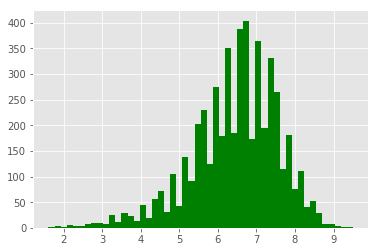

In [36]:
plt.hist(df['imdb_score'], bins=50, color='green')

### Exercise 2

- Create a histogram of the budget column. Did you encounter any error? See whether you can fix it by following this [Stack Overflow Link](http://stackoverflow.com/q/20656663)

- How does the graph look? Is there anyway to improve this? What does x-axis stand for? 
- All the code in the same cell will contribute to the same plot. Similiar to adding different layers in ggplot2
- Type `plt.` and press tab to see if you can get any hint.

Text(0.5, 1.0, 'Histogram of budget')

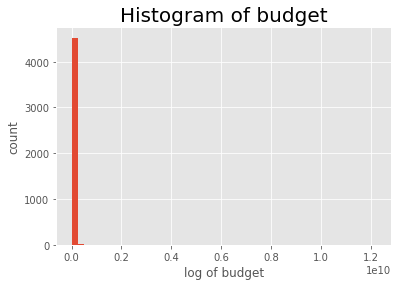

In [39]:
#### Your code here

plt.hist(df['budget'], bins =50)
plt.xlabel('log of budget')
plt.ylabel('count')
plt.title('Histogram of budget', fontsize=20)


- Pandas dataframe also provides plotting function. It is calling the matplotlib library behind the scenes.
- You can check all the available plots from the documenation [here](https://pandas.pydata.org/pandas-docs/stable/visualization.html)
- To make the plot looks nicer, we can import the seaborn package here.

Text(0.5, 1.0, 'Histogram of budget')

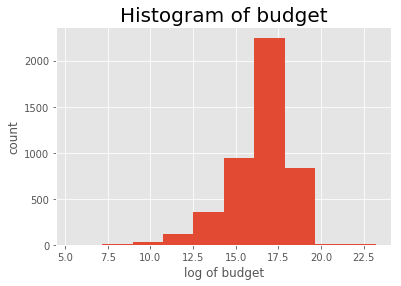

In [40]:
import seaborn as sns
log_budget = np.log(df['budget'])
log_budget.plot.hist()
plt.xlabel('log of budget')
plt.ylabel('count')
plt.title('Histogram of budget', fontsize=20)

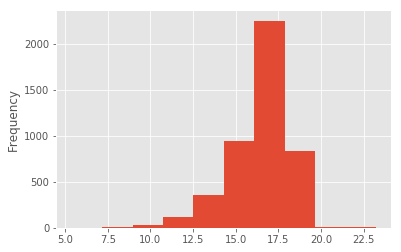

In [41]:
log_budget.plot(kind='hist')

# Scatterplot
- Scatterplots are useful for bivariate analysis. We can check the relationship between two columns.
- Suppose we want to figure out whether there is a relationship between the gross income and the budget.

Text(0, 0.5, 'Gross Income')

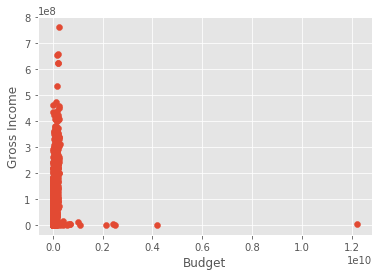

In [42]:
plt.scatter(df['budget'], df['gross'])
plt.xlabel('Budget')
plt.ylabel('Gross Income')

- Here is a way to plot it using the plotting function from pandas.

Text(0, 0.5, 'Gross Income')

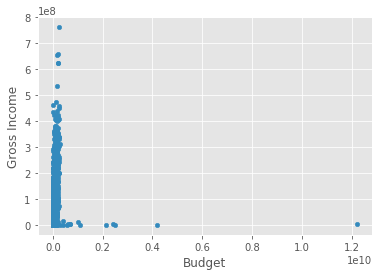

In [43]:
#df.plot.scatter(x='budget', y='gross')
df.plot(kind='scatter',x='budget', y='gross')
plt.xlabel('Budget')
plt.ylabel('Gross Income')

- We can see here there are some outliers there so it makes the graph less useful. 
- Let's try to remove them from our dataframe using the apply function.

In [47]:
scatter_df = df[['gross', 'budget']]
scatter_df = scatter_df.loc[scatter_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)] 
#z-score - taking abs value -3 to 3

In [48]:
scatter_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)

2       False
5       False
7       False
11      False
12      False
14      False
16      False
18      False
19      False
22      False
24      False
25      False
28      False
34      False
37      False
38      False
39      False
40      False
41      False
42      False
44      False
46      False
47      False
48      False
49      False
50       True
51      False
52      False
56      False
57      False
        ...  
4959     True
4962     True
4964     True
4971     True
4973     True
4975     True
4977     True
4978     True
4979     True
4984     True
4987     True
4997     True
4998     True
5004     True
5008     True
5009     True
5011     True
5012     True
5015     True
5021     True
5023     True
5025     True
5026     True
5027     True
5029     True
5033     True
5034     True
5035     True
5037     True
5042     True
Length: 3786, dtype: bool

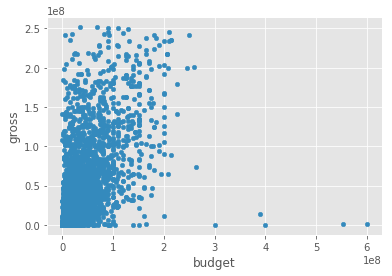

In [49]:
scatter_df.plot.scatter(x='budget', y='gross')

- Sometimes it is interesting to take a look at those outliers. 
- In the previous example, we remove the outlier, we can simply use the **~** symbol for the other way around. 
- We can merge the outlier dataframe with the original one to get other features and sort by the amount of budget in a descending order.

In [52]:
outliers = df[['gross', 'budget']].dropna()
outliers = outliers.loc[~outliers.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]


In [51]:
outliers.shape

(93, 2)

In [53]:
outliers.merge(df, how='left', left_index=True, right_index=True, suffixes=['', '_y'])[['gross', 'budget', 'movie_title']].\
sort_values(by='budget', ascending=False)

,gross,budget,movie_title
2988,2201412.0,1.221550e+10,The Host
3859,211667.0,4.200000e+09,Lady Vengeance
3005,195888.0,2.500000e+09,Fateless
2323,2298191.0,2.400000e+09,Princess Mononoke
2334,410388.0,2.127520e+09,Steamboy
3423,439162.0,1.100000e+09,Akira
4542,10037390.0,1.000000e+09,Godzilla 2000
1,309404152.0,3.000000e+08,Pirates of the Caribbean: At World's End
6,336530303.0,2.580000e+08,Spider-Man 3
3461,336530303.0,2.580000e+08,Spider-Man 3


- Next, let's check out whether there is a relationship between imdb_score and gross income. 

In [54]:
score_df = df[['gross', 'imdb_score']]

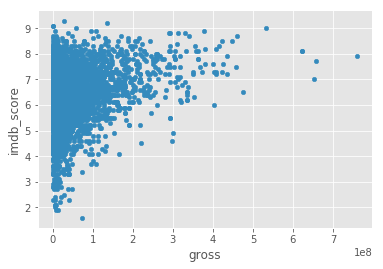

In [55]:
score_df.plot.scatter('gross', 'imdb_score')

### Exercise 3
- How is gross income related to director Facebook likes? 
- How is the imdb_score related to num_critic_for_reviews?

In [56]:
#### Your code here
print(df.columns)
gross_df = df[['director_facebook_likes', 'gross']]
critic_df = df[['num_critic_for_reviews', 'imdb_score']]

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')


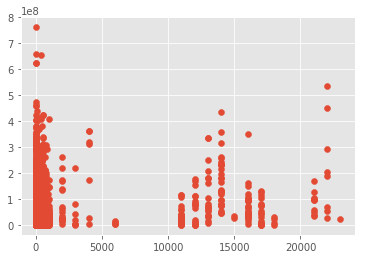

In [59]:
plt.scatter(gross_df['director_facebook_likes'],gross_df['gross'])

# Barplot

- Barplot is often used to visualize the amount of each class in a categorical feature. It shows the difference between factors.
- i.e which country has the highest median imdb score

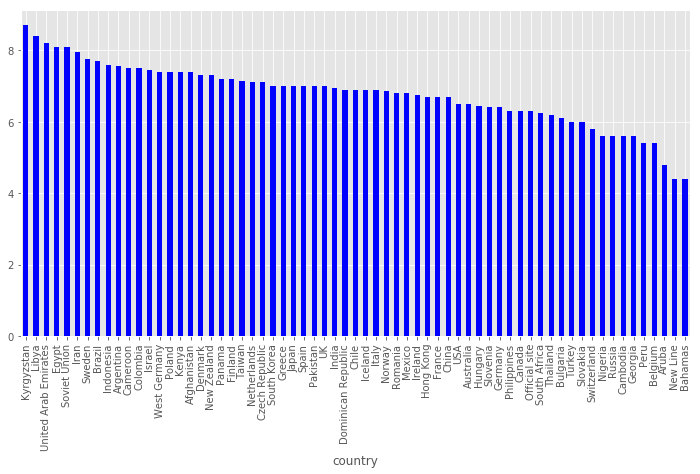

In [65]:
plt.figure(figsize=(12,6))
df.groupby('country')['imdb_score'].median().sort_values(ascending=False).plot.bar(color='b')

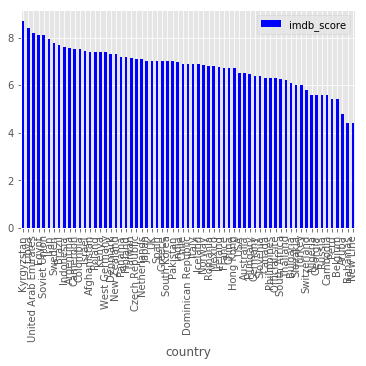

In [66]:
df[['country','imdb_score']].groupby('country').median().sort_values(ascending=False, by='imdb_score').plot(kind='bar', color='b')

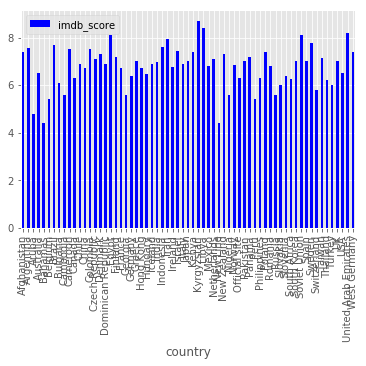

In [69]:
df[['country','imdb_score']].groupby('country').median().plot.bar(color='b')

- The plot becomes hard to interpret when the number of bars becomes large.

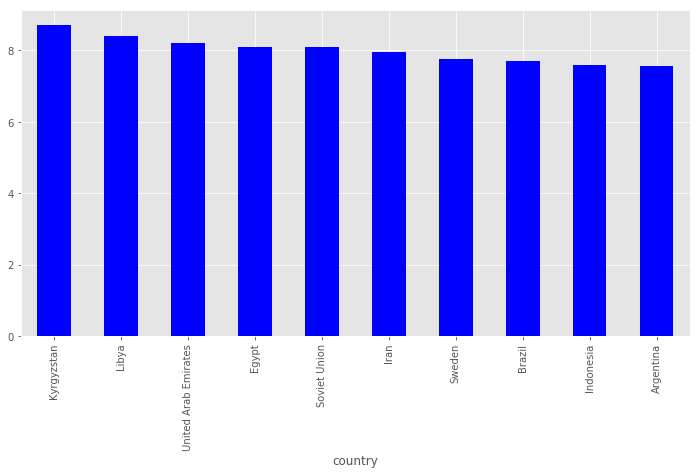

In [72]:
plt.figure(figsize=(12,6))
df.groupby('country')['imdb_score'].median().sort_values(ascending=False).head(10).plot.bar(color='b')


- However, there is only one observation belongs to Kyrgyzstan. It would be unfair to claim that Kyrgyzstan makes the best movies.
- Let's remove the countries that have less than 10 movies.

In [73]:
df.loc[df.country=='Kyrgyzstan']

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
4468,Color,Sadyk Sher-Niyaz,16.0,135.0,135.0,0.0,Aziz Muradillayev,0.0,NaN,Action|Biography|Drama|History,Elina Abai Kyzy,Queen of the Mountains,3144,0,Mirlan Abdulayev,1.0,19th century|central asia|mother son relations...,http://www.imdb.com/title/tt2640460/?ref_=fn_t...,24.0,English,Kyrgyzstan,PG-13,1400000.0,2014.0,0.0,8.7,2.35,0


- The argument of filter must be a function that, applied to the group as a whole, returns True or False.

In [74]:
df.filter?

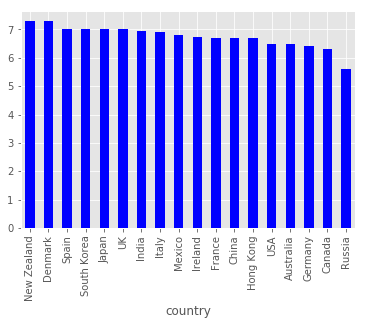

In [75]:
country_df = df.groupby('country').filter(lambda x: x.shape[0] > 10)
country_df.groupby('country')['imdb_score'].median().sort_values(ascending=False).plot.bar(color='b')

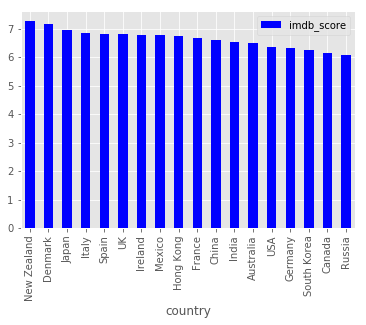

In [76]:
dg = df.groupby('country').agg({'duration':'count','imdb_score':'mean'})
dg[dg.duration>10].sort_values(ascending=False, by='imdb_score').plot(kind='bar',y='imdb_score', color='b')


- To see the trend of movie budget in the last 10 years, we can group the dataframe by year first and then calculate the mean of the budget column.

In [77]:
bar_df = df.groupby('title_year')[['budget']].mean().tail(10)
bar_df.head()

,budget
title_year,
2007.0,3.511748e+07
2008.0,4.180489e+07
2009.0,3.707329e+07
2010.0,4.547698e+07
2011.0,3.761537e+07


- The title year are float numbers when we read in the csv file. Let's change it to integer.

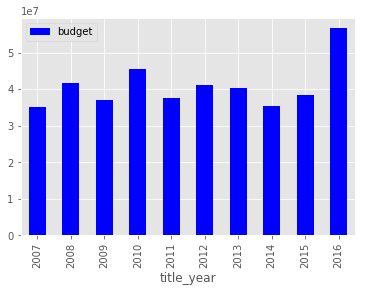

In [78]:
bar_df.index = bar_df.index.astype(np.int16)
bar_df.plot.bar(color='b')

### Genre
- Definitely we want to check out how the features changes across different genres. However, things get a little bit tricky here. We saw that genres are separated by the `|` symbol. At the same time, each movie might have more than one genre. So we may have to duplicate the row by multiple times.
- We will create a new dataframe that only contains the index and genre and merge it with the original dataframe based on the index.

In [110]:
# Make a copy of the original dataframe
df_genre = df.copy()
# Split the column the column using '|'
df_genre.genres = df_genre.genres.apply(lambda x: x.split('|'))

- Now the genres column becomes a list instead of a string.

In [111]:
df_genre.genres

0                    [Action, Adventure, Fantasy, Sci-Fi]
1                            [Action, Adventure, Fantasy]
2                           [Action, Adventure, Thriller]
3                                      [Action, Thriller]
4                                           [Documentary]
5                             [Action, Adventure, Sci-Fi]
6                            [Action, Adventure, Romance]
7       [Adventure, Animation, Comedy, Family, Fantasy...
8                             [Action, Adventure, Sci-Fi]
9                   [Adventure, Family, Fantasy, Mystery]
10                            [Action, Adventure, Sci-Fi]
11                            [Action, Adventure, Sci-Fi]
12                                    [Action, Adventure]
13                           [Action, Adventure, Fantasy]
14                           [Action, Adventure, Western]
15                   [Action, Adventure, Fantasy, Sci-Fi]
16                   [Action, Adventure, Family, Fantasy]
17            

In [112]:
# i keeps tracks of index
index=0
# save [index, genre] in a nested list
list_ = []
for item in df_genre.genres:
    list_.extend(map(lambda x: [index, x], item))
    index += 1
genre = pd.DataFrame(list_, columns=['index', 'genres'])
genre.head()
df_genre.genres

0                    [Action, Adventure, Fantasy, Sci-Fi]
1                            [Action, Adventure, Fantasy]
2                           [Action, Adventure, Thriller]
3                                      [Action, Thriller]
4                                           [Documentary]
5                             [Action, Adventure, Sci-Fi]
6                            [Action, Adventure, Romance]
7       [Adventure, Animation, Comedy, Family, Fantasy...
8                             [Action, Adventure, Sci-Fi]
9                   [Adventure, Family, Fantasy, Mystery]
10                            [Action, Adventure, Sci-Fi]
11                            [Action, Adventure, Sci-Fi]
12                                    [Action, Adventure]
13                           [Action, Adventure, Fantasy]
14                           [Action, Adventure, Western]
15                   [Action, Adventure, Fantasy, Sci-Fi]
16                   [Action, Adventure, Family, Fantasy]
17            

- Before we merge genre with the original dataframe, we want to remove the genres column first in order to avoid naming conflict.

In [113]:
df_genre = pd.merge(df_genre.drop('genres', axis=1), genre, how='right', left_index=True, right_on='index')
df_genre[['movie_title','genres']]

,movie_title,genres
0,Avatar,Action
1,Avatar,Adventure
2,Avatar,Fantasy
3,Avatar,Sci-Fi
4,Pirates of the Caribbean: At World's End,Action
5,Pirates of the Caribbean: At World's End,Adventure
6,Pirates of the Caribbean: At World's End,Fantasy
7,Spectre,Action
8,Spectre,Adventure
9,Spectre,Thriller


- All right, we get exactly what we want. Next we can group by the genre column and perform different analysis.
- Suppose we want to check out the imdb distribution among all the genres.

(14504, 29)


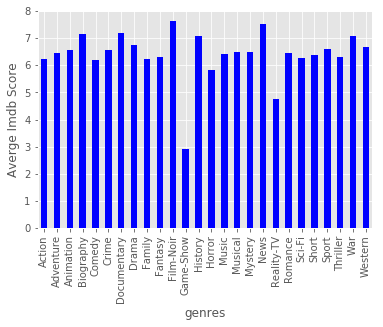

In [117]:
df_genre.groupby('genres')['imdb_score'].mean().plot.bar(color='b')
plt.ylabel('Averge Imdb Score')
print(df_genre.shape)

(14504, 2)


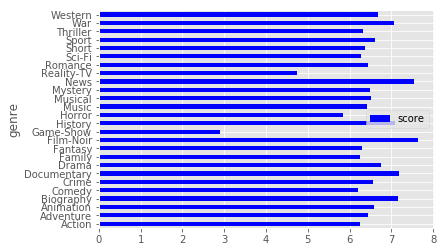

In [118]:
X = (zip(df.genres.str.split('|'), df['imdb_score']))
Y = (map(lambda t:list(zip(t[0],[t[1]]*len(t[0]))), X))
a, b = zip(*sum(Y,[]))  # flatten the list
Z = pd.DataFrame({'genre':a,'score':b})
print(Z.shape)
Z.groupby('genre').mean().plot(kind='barh', color='b')

### Exercise 4
- The previous barplot is sorted by the alphabetical order. What if we want to rank them by the mean `imdb_score` of each genre? 
- Which genre has the highest mean budget?
- When the number of bars becomes larger, it is a good idea to plot it horizitionally. See whether you can find the function from documentation or use the tab to see available functions.

In [ ]:
#### Your code here

plt.ylabel('Averge Imdb Score')

# Boxplot
- A boxplot is another way to visualize the distribution of a numeric feature. Let Q1, Q2 and Q3 represent the 25%, 50% and 75% quantile, respectively.
- A Boxplot is made of five quantiles: Q1−1.5(Q3−Q1), Q1, Q2, Q3, and Q3+1. 5(Q3−Q1). It can be made by function boxplot.

Text(0, 0.5, 'Imdb Score')

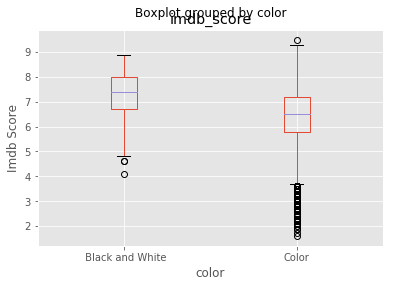

In [119]:
df_score = df[['color', 'imdb_score']]
df_score.boxplot(by='color', column='imdb_score')
plt.ylabel('Imdb Score')

**Exercise 5**

- What is distribution of budget for different kinds of poster?
- How to improve the plot to make it more interpretable?

(0, 200000000.0)

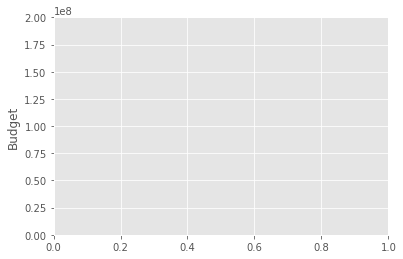

In [120]:
# Your code here
budget_df = df[['color', 'budget']].copy()

plt.ylabel('Budget')
plt.ylim(0,2e8)

# Seaborn

In [121]:
import seaborn as sns

- We can of course visualize the distribution of imdb score with histogram. However, seaborn provides a nice function that smooths out the histogram to estimate the distribution.

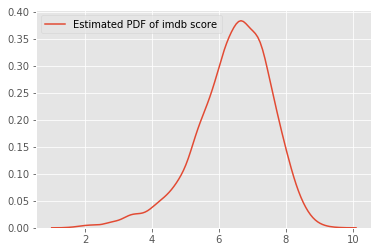

In [123]:
sns.kdeplot(df['imdb_score'], shade=False, label='Estimated PDF of imdb score')

- It is possible to combine histogram and the distribution estimate plot:

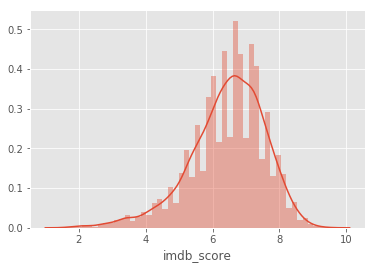

In [124]:
sns.distplot(df['imdb_score'])

- The joinplot() function combines histogram and scatter plot.
- Below we see "pearsonr=0.31" which indicates the pearson correlation of these two variables. However, we also see the p value is pretty small, which indicates that there is a significant linear relation between the two variables.

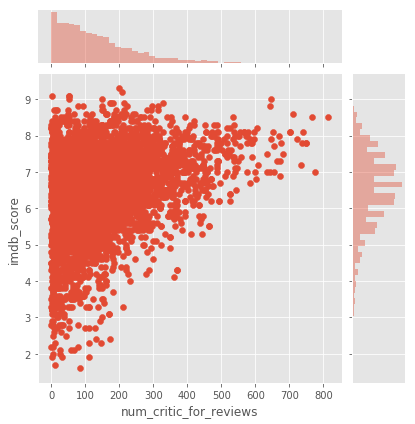

In [125]:
sns.jointplot(df['num_critic_for_reviews'], df['imdb_score'])

- We may also visualize the distribution of multiple features by using boxplot:

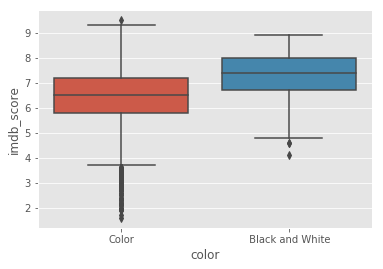

In [126]:
sns.boxplot(x='color', y='imdb_score', data=df)

### Advanced plots
- Seaborn also provides another famous sample dataset:

In [127]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


- This is a famous dataset record the information of people of different sex, being a smoker or not, visiting at different day or for different meal, the size of parties they joined, and the tip and the total bill they pay.
- To visualize the relation between total_bill and tip, of course we can use scatter plot. However, seaborn allows fitting with linear model as well.

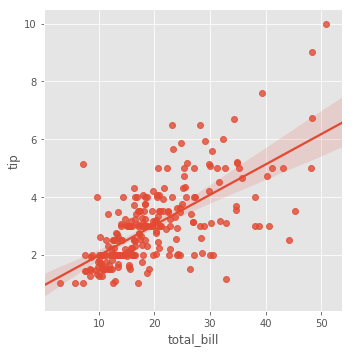

In [128]:
sns.lmplot("total_bill", "tip", tips)

- We can further split the data into "Male" and "Female" parts and visualize them.

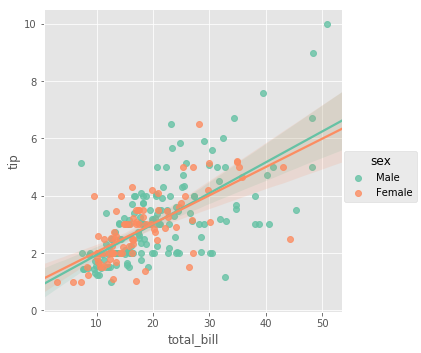

In [58]:
sns.lmplot("total_bill", "tip", tips, hue="sex", palette="Set2")

- You can also pass a dictionary to the palette argument by specifying the color of each level in the hue variable

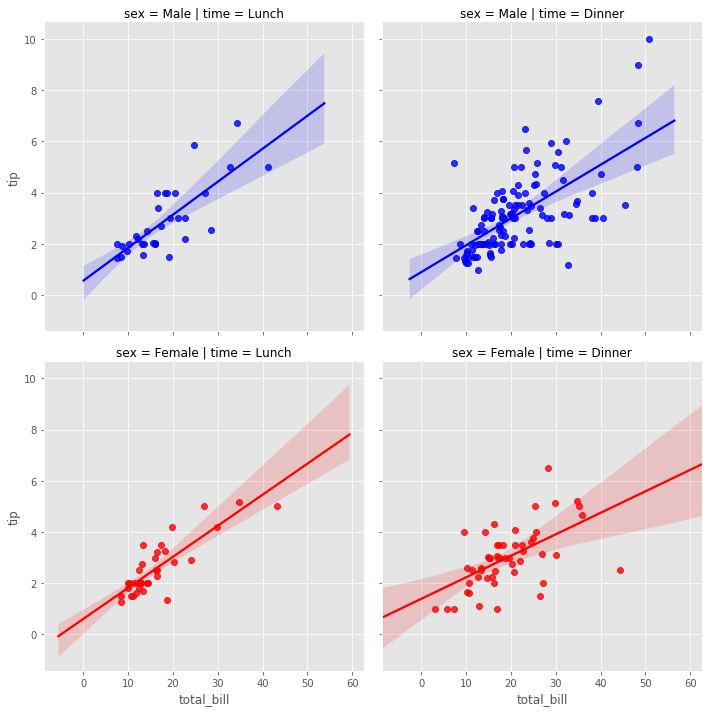

In [130]:
sns.lmplot("total_bill", "tip", tips, hue="sex", palette={"Male": "b", "Female": "r"}, col='time', row='sex')

- Here we used:
 - hue indicates according to which column we group our data.
 - palette simply specifies the color we want to use.

- We often need to compare the same kind of plot for different features. Functions for faceting comes in handy.
- Within the function FacetGrid(), hue indicates sketching a separate plot for each sex; col specifies that each plot is placed in a new column; palette specifies the colors. 
- Then we use .map() method to specify the type of the plot and the feature we want to visualize.

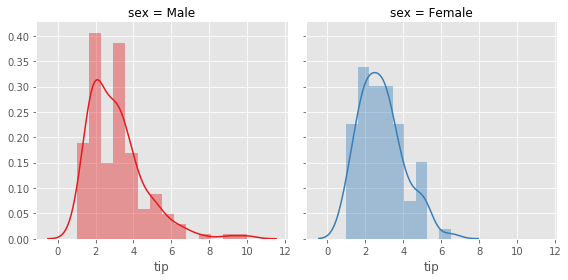

In [132]:
SexGrid = sns.FacetGrid(tips, col='sex', hue="sex", palette="Set1", height=4)
SexGrid.map(sns.distplot, "tip")

- Facet can be used to differentiate multiple factors as well.

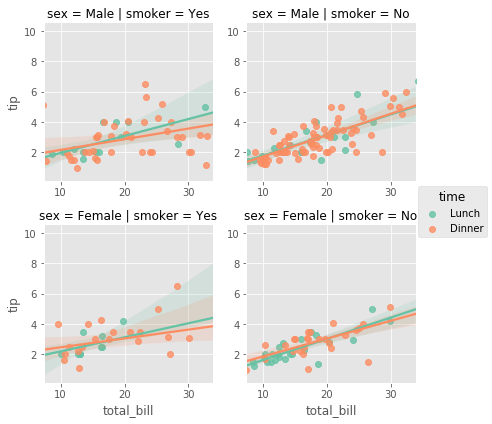

In [61]:
tipsGrid = sns.FacetGrid(tips, row='sex', col='smoker', hue='time', palette="Set2")
tipsGrid.map(sns.regplot,'total_bill','tip')
tipsGrid.add_legend()

### Exercise 6
Use FacetGrid to compare the distribution of imdb score for different poster color.

In [62]:
#### Your code here


# Plotly

- By default, plotly will host the image on their own server and it can only be viewed limited number of times.
- To run the image locally in our notebook, we need to run the following line of code.
- There is a cheatsheet [here](https://images.plot.ly/plotly-documentation/images/python_cheat_sheet.pdf) to help you get started with Plotly.

In [138]:
import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)

- `iplot` function will display the graph in the notebook, `plot` will create a separate html file in the notebook folder. It takes a `Figure` object as the input.
- To create a `Figure` object, we need to tell plotly what the data is and the layout of the figure.
- To customize the number of bins in the histogram, you need to tell plotly the starting point and the ending point, along with the size of each bin.
- In the layout, we can customize the title of the graph and the gap between two bins.
- Checkout more examples in the documentation [here](https://plot.ly/python/histograms/).

In [146]:
from plotly.graph_objs import Figure, Histogram, Layout

min_ = df['imdb_score'].min()
max_ = df['imdb_score'].max()

data = [Histogram(x=df['imdb_score'], 
                  xbins=dict(start=min_,
                             end=max_,
                             size=(max_-min_)/30))]
layout = Layout(title="Histogram of IMDB score",
                bargap=0.01)
fig = Figure(data=data, layout=layout)

plotly.offline.iplot(fig, show_link=False, image_width=600, image_height=400)

- If we want to compare the histogram of two groups, we can add one more element to our data list.
- For example, the imdb score of two different genres.

In [149]:
drama_imdb = df_genre.loc[df_genre.genres=='Drama']['imdb_score']
comedy_imdb = df_genre.loc[df_genre.genres=='Comedy']['imdb_score']
# or
#groups = df[['genres','imdb_score']].groupby('genres')
#drama_imdb = groups.get_group('Drama').imdb_score
#comedy_imdb = groups.get_group('Comedy').imdb_score


getbins = lambda t:{'start':t.min(),'end':t.max(), 'size':0.5}

trace0 = Histogram(x=drama_imdb,
                   name='Drama',
                   xbins=getbins(drama_imdb))

trace1 = Histogram(x=comedy_imdb,
                   name='Comedy',
                   xbins=getbins(drama_imdb))

data = [trace0, trace1]

layout = Layout(title="Histogram of Dram and Comedy IMDB score",
               bargroupgap=0.01)
fig = Figure(data=data, layout=layout)

plotly.offline.iplot(fig, show_link=True, image_width=600, image_height=400)

- Scatterplot is similar to histogram, with the `Histogram` object changed to `Scatter`.
- You can customize the hover text, different styles of the markers, etc when you create the `Scatter` object. 
- Checkout more examples in the documentation [here](https://plot.ly/python/line-and-scatter/).

In [150]:
from plotly.graph_objs import Scatter


data = [Scatter(x=df['budget'], y=df['gross'], mode = 'markers')]#, text=df['movie_title'])]
layout = Layout(title="Gross Income vs Budget")

fig = Figure(data=data, layout=layout)

plotly.offline.iplot(fig, show_link=False)

- Barplot follows the same pattern, you need to create a `Bar` object instead.
- Checkout more examples in the documentation [here](https://plot.ly/python/bar-charts/)

In [151]:
from plotly.graph_objs import Bar

country_df = country_df.groupby('country')['imdb_score'].median().sort_values(ascending=False).reset_index()

data = [Bar(x=country_df['country'], y=country_df['imdb_score'], text=country_df['country'])]
layout = Layout(title="Countries with Highest Median Imdb Score")

fig = Figure(data=data, layout=layout)

plotly.offline.iplot(fig,show_link=False)

- This is a brief introduction to the plotly package and their python API changes rapidly.
- Always check out the latest version and find more examples on the [documentation page](https://plot.ly/python/).

# Solutions

**Exercise 1**

In [ ]:
langs = ["English" ,"French", "Mandarin"]
df.loc[(df["language"].isin(langs)) & (df["imdb_score"]>7)]

**Exercsie 2**

Text(0.5, 1.0, 'Histogram of budget')

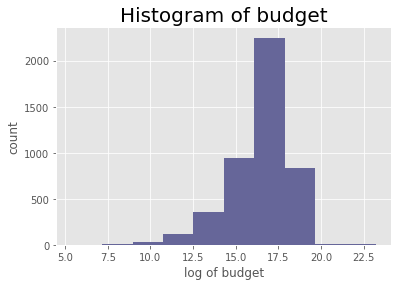

In [60]:
plt.hist(np.log(df['budget'].dropna()), color="#666699")
plt.xlabel('log of budget')
plt.ylabel('count')
plt.title('Histogram of budget', fontsize=20)

**Exercise 3**

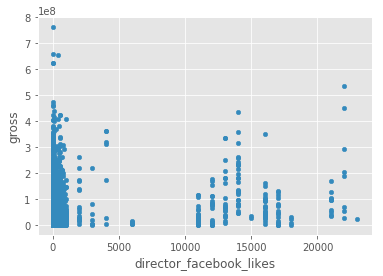

In [61]:
gross_df = df[['director_facebook_likes', 'gross']]
gross_df.plot.scatter('director_facebook_likes', 'gross')

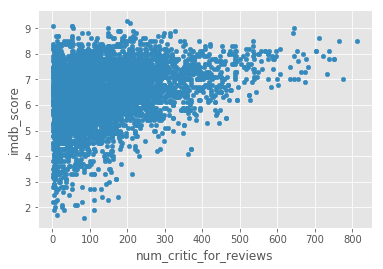

In [62]:
critic_df = df[['num_critic_for_reviews', 'imdb_score']]
critic_df.plot.scatter('num_critic_for_reviews', 'imdb_score')

**Exercise 4**

In [ ]:
df_genre.groupby('genres')['imdb_score'].mean().sort_values(ascending=False).plot.bar()
plt.ylabel('Averge Imdb Score')

In [ ]:
df_genre.groupby('genres')['budget'].mean().sort_values().plot.barh()

**Exercsie 5**

In [ ]:
budget_df = df[['color', 'budget']]
budget_df = budget_df.loc[(budget_df.budget - budget_df.budget.mean()).abs() / budget_df.budget.std() < 2]
budget_df.boxplot(by='color', column='budget')
plt.ylabel('Budget')
plt.ylim(0,2e8)

**Exercise 6**

In [ ]:
g = sns.FacetGrid(data=df, col='color', hue='color', palette='Set1', size=6)
g.map(sns.distplot, 'imdb_score')